In [53]:
# brian's genome bins
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import matplotlib.cm as cm
import seaborn as sns
from matplotlib import gridspec
import matplotlib.animation as manimation
import matplotlib.patches as patches
import time
from collections import Counter
import sklearn.cluster as cluster
import time
import hdbscan
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
import re
import ast
#import plotly. as py
#import plotly.graph_objs as go
font = {'family' : 'DejaVu Sans',
        'weight' : 'regular',
        'size'   : 16}

plt.rc('font', **font)
plt.rc('lines',lw=2) 
sns.set(font_scale = 2)

# dereks function for optimal leaf clustering
def _optimal_order(data, **kwargs):
    """ Optimal leaf ordering
        **kwargs passed to pdist e.g. metric='correlation'
    """
    d = pdist(data, **kwargs)
    link = linkage(d, method='average')
    optimal_order = optimal_leaf_ordering(link, d)
    return optimal_order

from scipy.spatial.distance import pdist, squareform
from fastcluster import linkage
from polo import optimal_leaf_ordering

In [2]:
# make sure this is up-to-date: see the separate notebook for that 
# current version: Oct 2017.
expt_name = 'Obs'
KEGGmoddf = pd.read_pickle('KEGG_modules_df')

In [3]:
# the original Obsidian metadata files
alt = pd.read_pickle('ObsCom_alt')
alt5 = pd.read_pickle('ObsCom_alt5')

In [50]:
# now we combine these with the checkm output file, as well as the bin_stats_ext.tsv file
# for a selection of the genome bins
# in the case directly below, I will include a genome bin if:
# 1) it has less than 5% contamination
# 2) more than 10% complete
# 3) less than 1% strain heterogeneity

In [54]:
# read the checkm output file (the tab-delimited text file)
filedir = 'Checkm/good_genomes/' # change this to be the right one 
checkmmeta = pd.read_table(filedir+'outputfile.txt')
checkmmeta = checkmmeta.set_index('Bin Id')
notinalt5 = checkmmeta[~checkmmeta.index.isin(alt5.index)].index
inalt5 = checkmmeta[checkmmeta.index.isin(alt5.index)].index

# read the checkm bin_stats_ext.tsv file (this has the other metadata like GC etc)
metadata = list(open(filedir+'storage/bin_stats_ext.tsv'))
metadata = [m.split('\n') for m in metadata]
metadf = pd.DataFrame.from_records(metadata)
metadf = metadf.drop(1,1)
metadf.columns = ['bla']
metadf = metadf['bla'].str.split('\t',1,expand=True)
metadf = metadf.set_index(0)
metadf.columns = ['metadata']

columns = ['marker lineage','Completeness','Contamination','# contigs','Genome size','# genomes','# marker sets','# markers','# predicted genes','Coding density','GC','GC std','Longest contig','Mean contig length','N50 (contigs)']
metadata_obs3 = pd.DataFrame(index=metadf.index,columns=columns)

for d in metadf.index:
    dictionary = ast.literal_eval(metadf.loc[d,'metadata'])
    for j in metadata_obs3.columns:
        metadata_obs3.loc[d,j] = dictionary[j]
checkm_metadata = metadata_obs3.copy()
checkm_metadata.to_pickle(filedir+'metadata_pickle')

In [274]:
# do this to include x,y coordinates of clusters (hack)
expt_name = 'Obsidian2'
a = pd.read_pickle(expt_name+'_minimeta_HDBclusterdf')
clusterRes_df = pd.DataFrame(columns=['sample','assembly','index']+list(a))
exptnames = ['Obsidian2','Obsidian3','Obsidian4','Obsidian5','Obsidian6']

for i in exptnames:
    if i!='Obsidian6':
        a = pd.read_pickle(i+'_minimeta_HDBclusterdf_16S')
    else:
        a = pd.read_pickle(i+'_minimeta_HDBclusterdf')
    b = pd.read_pickle(i+'_megahit_HDBclusterdf_16S')
    c = pd.read_pickle(i+'_metaSpades_HDBclusterdf_16S')
    
    a['sample'] = i; a['assembly'] = 'mini'
    b['sample'] = i; b['assembly'] = 'mega'
    c['sample'] = i; c['assembly'] = 'meta'
    
    clusterRes_df = clusterRes_df.append(a,ignore_index=True)
    clusterRes_df = clusterRes_df.append(b,ignore_index=True)
    clusterRes_df = clusterRes_df.append(c,ignore_index=True)
exwhy = clusterRes_df[['mu_x','mu_y']]
exwhy.index = 'Obs'+clusterRes_df['sample'].str[-1]+'_'+clusterRes_df['assembly']+'_'+clusterRes_df['cluster#'].astype(str)

In [374]:
checkm_metadata[checkm_metadata.index.str.contains('Obs6')]
checkmmeta

,Marker lineage,# genomes,# markers,# marker sets,0,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity
Bin Id,,,,,,,,,,,,,
M50,k__Archaea (UID146),59,174,136,44,130,0,0,0,0,69.49,0.00,0.0
M52,p__Euryarchaeota (UID3),148,187,124,4,182,1,0,0,0,96.77,0.81,0.0
Obs2_mega_0,k__Bacteria (UID203),5449,104,58,79,25,0,0,0,0,27.51,0.00,0.0
Obs2_mega_12,k__Archaea (UID2),207,149,107,26,122,1,0,0,0,79.91,0.93,0.0
Obs2_mega_13,k__Archaea (UID2),207,145,103,51,93,1,0,0,0,65.94,0.97,0.0
Obs2_mega_14,c__Thermoprotei (UID148),41,245,158,137,108,0,0,0,0,37.95,0.00,0.0
Obs2_mega_15,c__Thermoprotei (UID148),41,245,158,155,90,0,0,0,0,37.51,0.00,0.0
Obs2_mega_18,c__Thermoprotei (UID147),54,217,168,12,205,0,0,0,0,94.05,0.00,0.0
Obs2_mega_20,c__Thermoprotei (UID147),54,217,168,77,140,0,0,0,0,67.50,0.00,0.0


In [245]:
cols = ['domain','phylum','species','assembly','sample',
        'length']+[checkmmeta.columns[-1]]+list(checkm_metadata.columns)
newMetafile = pd.DataFrame(index=list(inalt5)+list(notinalt5),columns=cols)
newMetafile.loc[inalt5,cols[0:6]] = alt5.loc[inalt5,cols[0:6]]
newMetafile.loc[notinalt5,cols[3:5]] = alt.loc[notinalt5,cols[3:5]]
newMetafile.loc[notinalt5,'domain'] = alt.loc[notinalt5,'dominant domain']
newMetafile.loc[notinalt5,'phylum'] = alt.loc[notinalt5,'dominant phylum']
newMetafile.loc[notinalt5,'species'] = alt.loc[notinalt5,'dominant species']
newMetafile[cols[6]] = checkmmeta[cols[6]]
newMetafile[cols[7:]] = checkm_metadata[cols[7:]]
newMetafile.to_pickle(filedir+'all_metadata_combined')

In [248]:
# load metafile of KEGG genomes (see Google doc 'Metabolic analysis overview' 
# for the origin of the .tsv file)

keggmeta = pd.read_table('Knumbers/20171024_downloaded_KEGGKO.tsv')
keggmeta['sample'] = 'KEGG';keggmeta['Completeness'] = 100.0
combinedMeta = newMetafile.append(keggmeta.set_index('KEGG_ID')[['domain','phylum','species','sample','Completeness']])
combinedMeta.to_pickle('Knumbers/combinedMetafile_good_genomes')
combinedMeta

,# contigs,# genomes,# marker sets,# markers,# predicted genes,Coding density,Completeness,Contamination,GC,GC std,...,Mean contig length,N50 (contigs),Strain heterogeneity,assembly,domain,length,marker lineage,phylum,sample,species
M50,178,59,136,174,1902,0.910811,69.4853,0,0.452029,0.0208142,...,9643.1,10498,0.0,megameta,Archaea,1.71647e+06,k__Archaea,Crenarchaeota,Obs4,Vulcanisaeta distributa
M52,66,148,124,187,1395,0.910007,96.7742,0.806452,0.359978,0.0190859,...,19919.6,25904,0.0,megameta,Archaea,1.3147e+06,p__Euryarchaeota,Euryarchaeota,Obs4,Unassigned
Obs2_mega_3,137,59,136,174,1281,0.896678,58.734,0,0.479817,0.0256915,...,8177.16,8627,0.0,mega,Archaea,1.12027e+06,k__Archaea,Crenarchaeota,Obs2,Caldivirga maquilingensis
Obs2_mini_15,55,41,158,245,536,0.899123,35.4236,0.21097,0.491676,0.0174322,...,7649.27,8025,0.0,mini,Archaea,420710,c__Thermoprotei,Crenarchaeota,Obs2,Thermogladius cellulolyticus
Obs2_mini_5,33,5656,24,56,318,0.926326,12.5,0,0.263766,0.0449799,...,7501.48,7329,0.0,mini,Archaea,247549,root,Nanoarchaeota,Obs2,Candidatus Nanopusillus acidilobi
Obs3_mini_10,77,5443,59,105,731,0.951865,45.8398,0,0.573654,0.0236793,...,8663.87,8987,0.0,mini,Bacteria,667118,k__Bacteria,Unassigned,Obs3,Unassigned
Obs3_mini_19,44,5449,58,104,341,0.938949,14.7335,0,0.435296,0.0171368,...,7185.86,7031,0.0,mini,Bacteria,316178,k__Bacteria,Proteobacteria,Obs3,Syntrophorhabdus aromaticivorans
Obs3_mini_23,72,207,103,145,810,0.879971,45.0647,0,0.512375,0.0209135,...,8771.36,9280,0.0,mini,Archaea,631538,k__Archaea,Thaumarchaeota,Obs3,unclassified
Obs3_mini_26,43,207,107,149,416,0.877627,17.757,0,0.491919,0.0186683,...,7851.12,7976,0.0,mini,Archaea,337598,k__Archaea,Unassigned,Obs3,Unassigned
Obs3_mini_28,29,5449,58,104,294,0.899378,17.3981,0,0.325638,0.0245071,...,9126.38,9200,0.0,mini,Bacteria,264665,k__Bacteria,Proteobacteria,Obs3,Candidatus Babela massiliensis


In [142]:
# extract K-numbers from complete genomes
import os
from os import listdir
from os.path import isfile, join

mypath = 'Knumbers/KEGG_genomes/'
newpath = mypath+'processed/'

# get the genomes to extract K-numbers from
genomelist = [f[0:-9] for f in listdir(mypath) if isfile(join(mypath, f))]
genomelist

# make a dataframe with [genomelist] columns
Klist = pd.DataFrame(columns=genomelist)

# open the complete genomes in question
a=0
for gen in genomelist:
    genome = pd.read_table(mypath+gen+'00001.keg')
    klist = genome['GENES'].str[0:6].dropna().to_frame().reset_index(drop=True)
    klist.columns = [gen]
    if a==0:
        Klist = klist.copy()
        a=1
    else:
        Klist = Klist.join(klist,how='outer')


Klist.to_pickle(newpath+'Klist_complete_genomes')

# save the K-numbers per genome to a separate text file 
for i in Klist.columns:
    Klist[i].to_csv(newpath+i+'.txt',sep='\t')

In [118]:
from urllib.request import Request, urlopen, URLError
from urllib.parse import urlencode
from lxml import etree
import lxml
import html2text as h2t
from html.parser import HTMLParser

class myhtmlparser(HTMLParser):
    def __init__(self):
        super().__init__()
        self.reset()

        self.NEWTAGS = []
        self.NEWATTRS = []
        self.HTMLDATA = []
    def handle_starttag(self, tag, attrs):
        self.NEWTAGS.append(tag)
        self.NEWATTRS.append(attrs)
    def handle_data(self, data):
        self.HTMLDATA.append(data)
    def clean(self):
        self.NEWTAGS = []
        self.NEWATTRS = []
        self.HTMLDATA = []

In [122]:
# this assumes 'Klist' dataframe exists, this is made above

def retrieveKEGGmodules(typedata):
    #typedata can be: 'all','complete', or 'conservative'
    if typedata == 'conservative':
        mode = 'complete+ng1'
    else:
        mode = typedata
        
    mypath = 'Knumbers/KEGG_genomes/'
    newpath = mypath+'processed/'
    # make dataframe
    Mlist = pd.DataFrame(columns=Klist.columns)
    # make a datafame containing the KEGG entries for known hits. This is incomplete!
    # as I have hits not showing up in the known genomes. 
    # edit Oct 2017: just make a range of len(max(Modules in KEGG database))
    dta = list(range(0,844))
    dta2 = ['M0000'+str(dta[s]) for s in range(0,
                        10)]+['M000'+str(dta[s]) for s in range(10,
                            100)]+['M00'+str(dta[s]) for s in range(100,len(dta))]
    #Mmap = pd.DataFrame(index=known_genomes.index,columns=Klist.columns)
    Mmap = pd.DataFrame(index=dta2,columns=Klist.columns)
    
    a=0
    start_time = time.time()   
    for s in Klist.columns:

        #get list of KEGG genes for a given cluster (tab-delimited text)
        with open(newpath+s+'.txt', 'rt') as f:
            dat = f.read()

        # retrieve data from KEGG database
        url = 'http://www.genome.jp/kegg-bin/find_module_object'
        params = urlencode({'unclassified': dat, 'mode': mode}).encode()
        html = urlopen(url, params).read()


        # save as html file for reference purposes (and look at detailed output)
        with open(newpath+'html/'+s+'_'+typedata+'.html', 'wb') as f:
            f.write(html)

        # convert data to list
        pstring = html.decode('utf8') 
        parser = myhtmlparser()
        parser.feed(pstring)

        # Extract data from parser
        tags  = parser.NEWTAGS
        attrs = parser.NEWATTRS
        data  = parser.HTMLDATA

        # Clean the parser
        parser.clean()

        # extract Module numbers and feed to dataframe
        indices = [i for i, s in enumerate(data) if 'M00' in s]
        mdata = [data[s] for s in indices]
        mdatadf = pd.DataFrame(mdata,columns=[s])

        if a==0:
            Mlist = mdatadf.copy()
            a=1
        else:
            Mlist = Mlist.join(mdatadf,how='outer')
        Mmap.loc[mdatadf.set_index(s).index,s] = 1
    
    end_time = time.time()            
    print('Retrieving modules from KEGG database took {:.2f} s'.format(end_time - start_time)) 
    Mlist.to_pickle(newpath+'module_list_'+typedata)
    Mmap.to_pickle(newpath+'/module_map_'+typedata)
    
    return (Mlist,Mmap)


In [143]:
Mlistfull_all,Mmapfull_all = retrieveKEGGmodules('all')
Mlistfull_cons,Mmapfull_cons = retrieveKEGGmodules('conservative')
Mlistfull_comp,Mmapfull_comp = retrieveKEGGmodules('complete')

Retrieving modules from KEGG database took 96.83 s
Retrieving modules from KEGG database took 60.68 s
Retrieving modules from KEGG database took 45.20 s


In [125]:
# now load the other Mmap files (grouped and ungrouped, in the three categories)
Mmap_all_NU = pd.read_pickle('Mmap_all_NU_new')
Mmap_cons_NU = pd.read_pickle('Mmap_cons_NU_new')
Mmap_complete_NU = pd.read_pickle('Mmap_complete_NU_new')
Mmap_all_NU_col = pd.read_pickle('Mmap_all_NU_col_new')
Mmap_cons_NU_col = pd.read_pickle('Mmap_cons_NU_col_new')
Mmap_complete_NU_col = pd.read_pickle('Mmap_complete_NU_col_new')
Mmap_all_NU_grp = pd.read_pickle('Mmap_all_NU_grp_new')
Mmap_cons_NU_grp = pd.read_pickle('Mmap_cons_NU_grp_new')
Mmap_complete_NU_grp = pd.read_pickle('Mmap_complete_NU_grp_new')
Mmap_all_NU_grp_col = pd.read_pickle('Mmap_all_NU_grp_col_new')
Mmap_cons_NU_grp_col = pd.read_pickle('Mmap_cons_NU_grp_col_new')
Mmap_complete_NU_grp_col = pd.read_pickle('Mmap_complete_NU_grp_col_new')

In [158]:
Mmap_all_goodgen_comb = Mmapfull_all.join(Mmap_all_NU_grp[inalt5])
Mmap_all_goodgen_comb = Mmap_all_goodgen_comb.join(Mmap_all_NU[notinalt5])

In [232]:
Mmap_cons_goodgen_comb = Mmapfull_cons.join(Mmap_cons_NU_grp[inalt5])
Mmap_cons_goodgen_comb = Mmap_cons_goodgen_comb.join(Mmap_cons_NU[notinalt5])

"""Mmap_cons_goodgen_comb = Mmapfull_comp.join(Mmap_cons_NU_grp[inalt5])
Mmap_cons_goodgen_comb = Mmap_cons_goodgen_comb.join(Mmap_cons_NU[notinalt5])"""

'Mmap_cons_goodgen_comb = Mmapfull_comp.join(Mmap_cons_NU_grp[inalt5])\nMmap_cons_goodgen_comb = Mmap_cons_goodgen_comb.join(Mmap_cons_NU[notinalt5])'

In [155]:
Mmap_comp_goodgen_comb = Mmapfull_comp.join(Mmap_complete_NU_grp[inalt5])
Mmap_comp_goodgen_comb = Mmap_comp_goodgen_comb.join(Mmap_complete_NU[notinalt5])

In [233]:
# now make colored maps (as a first, try assigning the same bacterial/archaeal colors)
# then also try letting them stand out (e.g. green)

Mmap_all_goodgen_comb_col = Mmapfull_all.join(Mmap_all_NU_grp_col[inalt5]).copy()
Mmap_all_goodgen_comb_col = Mmap_all_goodgen_comb_col.join(Mmap_all_NU_col[notinalt5])

Mmap_cons_goodgen_comb_col = Mmapfull_cons.join(Mmap_cons_NU_grp_col[inalt5]).copy()
#Mmap_cons_goodgen_comb_col = Mmapfull_comp.join(Mmap_cons_NU_grp_col[inalt5]).copy()
Mmap_cons_goodgen_comb_col = Mmap_cons_goodgen_comb_col.join(Mmap_cons_NU_col[notinalt5])

Mmap_comp_goodgen_comb_col = Mmapfull_comp.join(Mmap_complete_NU_grp_col[inalt5]).copy()
Mmap_comp_goodgen_comb_col = Mmap_comp_goodgen_comb_col.join(Mmap_complete_NU_col[notinalt5])

# color look-up table
domlist = ['Archaea', 'Bacteria', 'Unassigned', 'Viruses']
domcol = [-1,.5,1,-.6]
lut = dict(zip(domlist,domcol))

for s in domlist:
    temp = combinedMeta[combinedMeta.index.isin(genomelist)]
    colorcols = temp[temp['domain']==s].index
    Mmap_all_goodgen_comb_col.loc[:,colorcols] = Mmap_all_goodgen_comb.loc[:,colorcols].multiply(lut[s])
    Mmap_cons_goodgen_comb_col.loc[:,colorcols] = Mmap_cons_goodgen_comb.loc[:,colorcols].multiply(lut[s])
    Mmap_comp_goodgen_comb_col.loc[:,colorcols] = Mmap_comp_goodgen_comb.loc[:,colorcols].multiply(lut[s])


In [234]:
path = 'OverviewHeatmaps/Pruned/withreference/'
Mmap_all_goodgen_comb.to_pickle(path+'good_genomes_all')
Mmap_cons_goodgen_comb.to_pickle(path+'good_genomes_cons')
Mmap_comp_goodgen_comb.to_pickle(path+'good_genomes_comp')
Mmap_all_goodgen_comb_col.to_pickle(path+'good_genomes_all_col')
Mmap_cons_goodgen_comb_col.to_pickle(path+'good_genomes_cons_col')
Mmap_comp_goodgen_comb_col.to_pickle(path+'good_genomes_comp_col')

In [354]:
############################################################################################
### plot the overview plots with all KEGG hits and all genomes 
############################################################################################

def plotClusterOverviewTot(KEGGhitType):
    
    if KEGGhitType == 'all':
        dataframe = pd.read_pickle(path+'good_genomes_all')
        dataframe_col = pd.read_pickle(path+'good_genomes_all_col')
    elif KEGGhitType == 'conservative':
        dataframe = pd.read_pickle(path+'good_genomes_cons')
        dataframe_col = pd.read_pickle(path+'good_genomes_cons_col')
    elif KEGGhitType == 'complete':
        dataframe = pd.read_pickle(path+'good_genomes_comp')
        dataframe_col = pd.read_pickle(path+'good_genomes_comp_col')
    else:
        import sys
        sys.exit("aborted, enter correct df type")
        
            
    """
    0 = Energy metabolism
    1 = Carb and lipid metabolism
    2 = Nucleic acid and aa metabolism
    3 = Secondary metabolism
    4 = Genetic info proc.
    5 = Env. info proc.
    6 = Metabolism
    7 = Cellular processes
    8 = Gene set
    """
    # some stored dataframes
    metadf = pd.read_pickle('Knumbers/combinedMetafile_good_genomes')
    KEGGmoddf = pd.read_pickle('KEGG_modules_df') #(from KEGG database -check for updates)
    mod_df = pd.read_pickle('KEGG_module_list') #(from KEGG database -check for updates)
    completeness = KEGGhitType

    
    ############################################################################################
    # cluster correlation for KEGG B-level = environmental info processing
    ############################################################################################

    dataC = dataframe.fillna(0).corr().dropna(how='all').T.dropna(how='all')
    clustindexlist = dataC.index

    D = pdist(dataC, 'correlation')
    Z = linkage(D, 'average')
    row_link = _optimal_order(dataC, metric='correlation')

    optimal_Z_clust = optimal_leaf_ordering(Z, D)

    cgClust = sns.clustermap(dataC, row_linkage=row_link, col_linkage=row_link,figsize=(20,40))


    ############################################################################################
    # KEGG-clust correlation for KEGG B-level = environmental info processing
    ############################################################################################

    #dataK = alt6.ix[idxblevdf['column'].values,:].T.corr() #np.random.choice(10000, (n, 1), replace=False)
    dataK = dataframe.fillna(0).T.corr()

    dataK = dataK.dropna(how='all').T.dropna(how='all')

    D = pdist(dataK, 'correlation')
    Z = linkage(D, 'average')
    row_link = _optimal_order(dataK, metric='correlation')

    optimal_Z = optimal_leaf_ordering(Z, D)

    cgKEGG_blevel = sns.clustermap(dataK, row_linkage=row_link, col_linkage=row_link,figsize=(10,10))
    roundd=0
    # sort by clustermap, 
    for blev in range(5,6):

        lut = {'Archaea':'r','Bacteria':'b','Unassigned':'k','Eukaryota':'c','Viruses':'m'}

        idx = cgKEGG_blevel.dendrogram_col.reordered_ind
        idxcl = cgClust.dendrogram_col.reordered_ind
        cmap=ListedColormap(["#e74c3c", "#3498db", "#2ecc71", "#95a5a6", "#34495e","#9b59b6"])
        cmap=ListedColormap(["#e74c3c", "#9b59b6", "#2ecc71", "#95a5a6", "#34495e","#3498db"])#[red,lightblue,green,GREY,darkblue,purple]
        #cmap = LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))

        f = plt.figure()
        gs = gridspec.GridSpec(45,37)


        dataK2 = dataK.copy()
        dataK2.index = mod_df.set_index('Module').loc[dataK.index]['Module_combined']

        ax1 = f.add_subplot(gs[4:36,0:11])
        sns.heatmap(dataK2.iloc[idx,idx],cbar=False,ax=ax1,xticklabels=True,yticklabels=True,cmap="RdBu_r",vmin=-1,vmax=1)
        plt.xticks([]);plt.yticks(fontsize=15)
        plt.xlabel('KEGG modules',fontsize=30,labelpad=40)

        ###############################################
        ######### the sorter #####################
        ###############################################
        #idx2 = alt.sort_values('assembly').index
        ###############################################
        ###############################################
        # save dataframe in ordered way for future examination
        clusteredframe = dataframe.loc[dataK.iloc[idx,:].index,dataC.iloc[idxcl,:].index]
        if roundd == 0:
            clusteredframe.to_pickle(path+'ClusteredDF_'+completeness)
            roundd=1 #save only once for a loop through B-levels

        ax2 = f.add_subplot(gs[4:36,13:32])
        sns.heatmap(dataframe_col.fillna(0).loc[dataK.iloc[idx,:].index,dataC.iloc[idxcl,:].index]
                    ,ax=ax2,cbar=False,linewidth=0.5,cmap=cmap,vmin=-1,vmax=1,xticklabels=True)
        plt.yticks([])
        plt.xlabel('Genome number',fontsize=30)
        #plt.xticks(rotation=0)

        ax13 = f.add_subplot(gs[37:,13:32])
        sns.heatmap(dataC.iloc[idxcl,idxcl],cbar=False,ax=ax13,cmap="RdBu_r",vmin=-1,vmax=1)
        plt.yticks([])
        plt.xticks([])

        ##############################################################################
        #################### plot hbars on right #####################################
        ##############################################################################
        

        arc = dataframe.loc[dataK.iloc[idx,:].index,metadf[metadf['domain']=='Archaea'].index].fillna(0).T.sum()
        bac = dataframe.loc[dataK.iloc[idx,:].index,metadf[metadf['domain']=='Bacteria'].index].fillna(0).T.sum()
        #vir = dataframe.loc[dataK.iloc[idx,:].index,metadf[metadf['Domain']=='Viruses'].index].T.sum()
        una = dataframe.loc[dataK.iloc[idx,:].index,metadf[metadf['domain']=='Unassigned'].index].fillna(0).T.sum()
            
        ax3 = f.add_subplot(gs[4:36,32]) #Archaea
        arc = arc/arc.sum()
        arc.plot.barh(ax=ax3,sharey=True, color="#e74c3c")
        ax3.grid(False)
        plt.title('Archaea',fontsize=25,rotation=45,y=1.02)
        plt.xticks([])
        #ax3.set_xlabel('Module-cluster\npresence (%)')
        plt.gca().invert_yaxis()

        ax4 = f.add_subplot(gs[4:36,33]) #Bacteria
        bac = bac/bac.sum()
        bac.plot.barh(ax=ax4,sharey=True, color='#34495e')
        ax4.grid(False)
        plt.title('Bacteria',fontsize=25,rotation=45,y=1.02)
        plt.xticks([])
        #ax3.set_xlabel('Module-cluster\npresence (%)')
        plt.gca().invert_yaxis()

        """ax5 = f.add_subplot(gs[4:36,34]) #Viruses
        vir = vir/vir.sum()
        vir.plot.barh(ax=ax5,sharey=True, color="#9b59b6")
        ax5.grid(False)
        plt.title('Viruses',fontsize=25)
        plt.xticks(rotation=90)
        #ax3.set_xlabel('Module-cluster\npresence (%)')
        plt.gca().invert_yaxis()"""

        ax6 = f.add_subplot(gs[4:36,34]) #Unassigned
        una = una/una.sum()
        una.plot.barh(ax=ax6,sharey=True, color="#3498db")
        ax6.grid(False)
        plt.title('Unassigned',fontsize=25,rotation=45,y=1.025)
        plt.xticks([])
        #ax3.set_xlabel('Module-cluster\npresence (%)')
        plt.gca().invert_yaxis()

        ax14 = f.add_subplot(gs[4:36,35:]) #Archaea-Bacteria    
        arc = arc/arc.max()
        bac = bac/bac.max()
        diff = arc-bac

        diff.plot.barh(ax=ax14,sharey=True, color="#e79f3c")
        ax14.grid(False)
        plt.title('Arch-Bact\ndifference',fontsize=25)
        #plt.xticks(rotation=90)
        plt.axvline(x=0);plt.xlim(-1,1)
        plt.gca().invert_yaxis()

        ##############################################################################
        ##########################   plot top bars   #################################
        ##############################################################################

        ax7 = f.add_subplot(gs[1,13:32]) #phylum
        
        col = sns.color_palette("cubehelix", len(list(metadf.loc[dataC.index]['phylum'].unique())))
        keys = list(metadf.loc[dataC.index]['phylum'].unique());values = [i for i in col]
        lut = dict(zip(keys,values))
        lut.update({'Unassigned':"#3498db"})
        color = metadf['phylum'].map(lut)

        for x,y in lut.items():
            plt.bar(0,0,color=y,label=x,width=1)
        plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
                   ncol=4, mode="expand", borderaxespad=0.,fontsize=20)

        plt.bar(list(range(0,len(dataC))),np.ones(len(dataC)),color=color[dataC.iloc[idxcl,:].index],width=1)
        plt.xticks([]);plt.yticks([])
        plt.xlim(-.5,len(dataC)-.5);plt.ylim(0,1)
        ax7.set_ylabel('Phylum', rotation=0, fontsize=30, labelpad=90)



        #3498db
        ax8 = f.add_subplot(gs[2,13:32]) #domain
        lut = {'Archaea':"#e74c3c",'Bacteria':'#34495e','Unassigned':"#3498db"}#'Eukaryota':'c','Viruses':"#9b59b6"}
        color = metadf['domain'].map(lut)

        for x,y in lut.items():
            plt.bar(0,0,color=y,label=x,width=1)
        plt.legend(bbox_to_anchor=(1.01, 0.95, 1., .102), loc=2,
                   ncol=2, borderaxespad=0.,fontsize=20)

        plt.bar(list(range(0,len(dataC))),np.ones(len(dataC)),color=color[dataC.iloc[idxcl,:].index],width=1)
        plt.xticks([]);plt.yticks([])
        plt.xlim(-.5,len(dataC)-.5);plt.ylim(0,1)
        ax8.set_ylabel('Domain', rotation=0, fontsize=30, labelpad=90)



        ax9 = f.add_subplot(gs[3,13:32]) #mean GC???
        
        #col = sns.color_palette("BrBG", len(alt['assembly'].unique()))
        #keys = np.sort(alt['assembly'].unique())
        #values = [i for i in col]
        #lut = dict(zip(keys,values))
        #color = alt['assembly'].map(lut)

        """for x,y in lut.items():
            plt.bar(0,0,color=y,label=x,width=1)
        plt.legend(bbox_to_anchor=(1.01, 0.95, 1., .102), loc=2,
                   ncol=3, borderaxespad=0.,fontsize=20)
        """
        #print(idxcl)
        listGC = list(metadf.T.loc['GC',dataC.iloc[idxcl,:].index])
        #print(listGC)
        sns.heatmap([listGC],ax=ax9,cbar=False,cmap="RdBu_r",linewidth=0.5,vmin=0,vmax=1,xticklabels=False)
        ax9.set_ylabel('GC-content', rotation=0, fontsize=30, labelpad=90)
        """plt.bar(list(range(0,len(dataC))),np.ones(len(dataC)),color=color[dataC.iloc[idxcl,:].index],width=1)
        plt.xlim(-.5,len(dataC)-.5);plt.ylim(0,1)
        plt.xticks([]);plt.yticks([])
        ax9.set_ylabel('Assembly', rotation=0, fontsize=30, labelpad=90)"""




        """ax10 = f.add_subplot(gs[3,13:32]) #experiment
        col = sns.color_palette("Set2", 5)
        if group == 'YES':
            lut = {'Obs2':col[0],'Obs3':col[1],'Obs4':col[2],'Obs5':col[3],'Obs6':col[4]}
            color2 = alt5['sample'].map(lut)BrianDataSets/figures/heatmaps/
        elif group == 'SC':
            col = sns.color_palette("Set2", 6)
            lut = {'Obs2':col[0],'Obs3':col[1],'Obs4':col[2],'Obs5':col[3],'Obs6':col[4],'mix':col[5]}
            color2 = altSC['sample'].map(lut)
        else:
            lut = {'Obsidian2':col[0],'Obsidian3':col[1],'Obsidian4':col[2],'Obsidian5':col[3],'Obsidian6':col[4]}
            color2 = alt['sample'].map(lut)

        for x,y in lut.items():
            plt.bar(0,0,color=y,label=x,width=1)
        plt.legend(bbox_to_anchor=(1.01, 0.95, 1., .102), loc=2,
                   ncol=3, borderaxespad=0.,fontsize=20)

        plt.bar(list(range(0,len(dataC))),np.ones(len(dataC)),color=color2[dataC.iloc[idxcl,:].index],width=1)
        plt.xticks([]);plt.yticks([])
        plt.xlim(-.5,len(dataC)-.5);plt.ylim(0,1)
        ax10.set_ylabel('Experiment', rotation=0, fontsize=30, labelpad=100)"""


        ##############################################################################
        ##########################   plot left side bars  ############################
        ##############################################################################
        Blevel = blev

        """
        0 = Energy metabolism
        1 = Carb and lipid metabolism
        2 = Nucleic acid and aa metabolism
        3 = Secondary metabolism
        4 = Genetic info proc.
        5 = Env. info proc.
        6 = Metabolism
        7 = Cellular processes
        8 = Gene set
        """
        # B-level assignment
        ax11 = f.add_subplot(gs[4:36,11])
        col = sns.color_palette("gist_earth", len(KEGGmoddf.B.unique())-1)
        keys = list(KEGGmoddf.B.unique());keys = keys[0:-1];values = [i for i in col]
        keysC = KEGGmoddf[KEGGmoddf['B']==keys[Blevel]].C.unique();

        lut = dict(zip(keys,values))
        idxlist = dataK.iloc[idx,:].index
        #idxlist2 = [i[0:6] for i in idxlist]
        D_group = KEGGmoddf.groupby('D-module').sum()

        for i in D_group.index:
            a = D_group.loc[i,'B']
            for j in keys:
                if a.find(j)!=-1:
                    D_group.loc[i,'B'] = j
            c = D_group.loc[i,'C']
            for j in KEGGmoddf.C.unique():
                if c.find(j)!=-1:
                    D_group.loc[i,'C'] = j

        B_list  = D_group.loc[idxlist]['B']
        #B_list.replace(B_list.index,idxlist)
        color = B_list.map(lut)

        for x,y in lut.items():
            plt.bar(0,0,color=y,label=x,width=1)
        plt.legend(bbox_to_anchor=(-20, 1.02, 1., .102), loc=3,
                   ncol=1, mode="expand", borderaxespad=0.,fontsize=30)

        plt.barh(list(range(0,len(dataK))),list(np.ones(len(dataK))),color=color,height=1)
        plt.xticks([]);plt.yticks([])
        plt.ylim(-.5,len(dataK)-.5)
        plt.xlim(0,1)
        ax11.set_xlabel('B', rotation=0, fontsize=30, labelpad=40)
        plt.gca().invert_yaxis()


        #C-level assignment

        ax12 = f.add_subplot(gs[4:36,12])
        col = sns.color_palette("Set3", len(keysC));values = [i for i in col]
        lutC = dict(zip(keysC,values))

        C_list  = D_group.loc[idxlist]['C']
        C_list.replace(C_list.index,idxlist)
        color = C_list.map(lutC)
        color = color.fillna('None')

        plt.barh(list(range(0,len(dataK))),list(np.ones(len(dataK))),color=color,height=1)
        plt.xticks([]);plt.yticks([])
        plt.ylim(-.5,len(dataK)-.5)
        plt.xlim(0,1)
        ax12.set_xlabel('C', rotation=0, fontsize=30, labelpad=40)
        plt.gca().invert_yaxis()

        for x,y in lutC.items():
            plt.bar(0,0,color=y,label=x,width=1)
        plt.legend(bbox_to_anchor=(-10, 1.02, 1., .102), loc=3,
                   ncol=1, mode="expand", borderaxespad=0.,fontsize=30)

        idx_blevel5 = C_list.loc[color[color!='None'].index].index
        idxblevdf = pd.DataFrame(idx_blevel5,columns=['column'])
        idxblevdf.to_pickle('ObsCom_indexblevel_'+completeness+'_'+str(Blevel))

        """ax5 = f.add_subplot(gs[0,:])
        ax5.text(0.5,0.5,'bla',fontsize=28,horizontalalignment='center',verticalalignment='center')
        ax5.grid(False)
        plt.yticks([])
        plt.xticks([])"""

        gs.update(wspace=.05,hspace=.05)
        plt.gcf().subplots_adjust(left=0.3)
        f.set_figheight(110)
        #plt.show()
        f.set_figwidth(90)
        f.savefig('OverviewHeatmaps/Pruned/withreference/OH_KEGG_goodgenomesref_'+completeness+'_'+keys[Blevel])
        f.savefig('OverviewHeatmaps/Pruned/withreference/pdfs/OH_KEGG_goodgenomesref_'+completeness+'_'+keys[Blevel]+'.pdf')
        f.clf()
        return(optimal_Z_clust,clustindexlist,idxcl)

In [359]:
optimalZcons,clustidxlist,idxcl = plotClusterOverviewTot('conservative')

In [372]:
keys = list(KEGGmoddf.B.unique());keys = keys[0:-1]
KEGGmoddf[KEGGmoddf['B']==keys[0]].C.unique()

array(['Carbon fixation', 'Nitrogen metabolism', 'Methane metabolism',
       'Sulfur metabolism', 'Photosynthesis', 'ATP synthesis'], dtype=object)

In [360]:
clustidxlist[idxcl]
#idxcl

Index(['Obs6_mega_6', 'Obs6_mega_11', 'Obs2_mega_21', 'Obs3_mini_26',
       'Obs3_mini_33', 'Obs2_mega_7', 'Obs3_meta_11', 'Obs2_mega_12',
       'Obs2_meta_16', 'Obs2_mega_5',
       ...
       'Obs5_mini_0', 'Obs5_mini_22', 'Obs5_mini_10', 'Obs5_mini_16',
       'Obs3_mini_19', 'Obs5_mini_1', 'Obs3_mini_22', 'Obs5_mega_0',
       'Obs3_mini_6', 'Obs3_mini_28'],
      dtype='object', length=138)

In [343]:
labels.values


array(['Bacteria, Aquificae, Thermocrinis ruber, KEGG',
       'Archaea, Euryarchaeota, Thermoplasmatales archaeon BRNA1, KEGG',
       'Bacteria, Dictyoglomi, Dictyoglomus thermophilum, KEGG',
       'Bacteria, Aquificae, Hydrogenobacter thermophilus, KEGG',
       'Archaea, Crenarchaeota, Caldivirga maquilingensis, KEGG',
       'Archaea, Crenarchaeota, Sulfolobus islandicus, KEGG',
       'Bacteria, Chloroflexi, Roseiflexus sp. RS-1, KEGG',
       'Archaea, Candidatus Korarchaeota, Candidatus Korarchaeum cryptofilum, KEGG',
       'Bacteria, Thermodesulfobacteria, Thermodesulfobacterium geofontis, KEGG',
       'Bacteria, Cyanobacteria, Thermosynechococcus elongatus, KEGG',
       'Archaea, Crenarchaeota, Acidianus hospitalis, KEGG',
       'Bacteria, Proteobacteria, Granulibacter bethesdensis, KEGG',
       'Archaea, Crenarchaeota, Sulfolobus tokodaii, KEGG',
       'Archaea, Micrarchaeota, Candidatus Micrarchaeota archaeon, KEGG',
       'Archaea, Crenarchaeota, Caldisphaera lagun

In [366]:
# make trees from dendograms 
import skbio
#conserv_energy_metab_sorted = pd.read_pickle('Mmap_cons_NU_grp_new')
skbio.tree.TreeNode.from_linkage_matrix(optimalZcons,clustidxlist).write("pruned_withreference_cons.nwk")
labels = combinedMeta.loc[clustidxlist,'domain']+'_'+combinedMeta.loc[clustidxlist,'phylum']+'_'+combinedMeta.loc[clustidxlist,'species']+'_'+combinedMeta.loc[clustidxlist].index
skbio.tree.TreeNode.from_linkage_matrix(optimalZcons,labels.values).write("pruned_withreference_phyla_cons.nwk")
#skbio.tree.TreeNode.from_linkage_matrix(optimal_Z_sel,alt5.loc[indexlist]['phylum'].values).write("pruned_withreference_all.nwk")
#skbio.tree.TreeNode.from_linkage_matrix(optimal_Z_sel,alt5.loc[indexlist]['species'].values).write("pruned_withreference_all.nwk")

'pruned_withreference_phyla_cons.nwk'

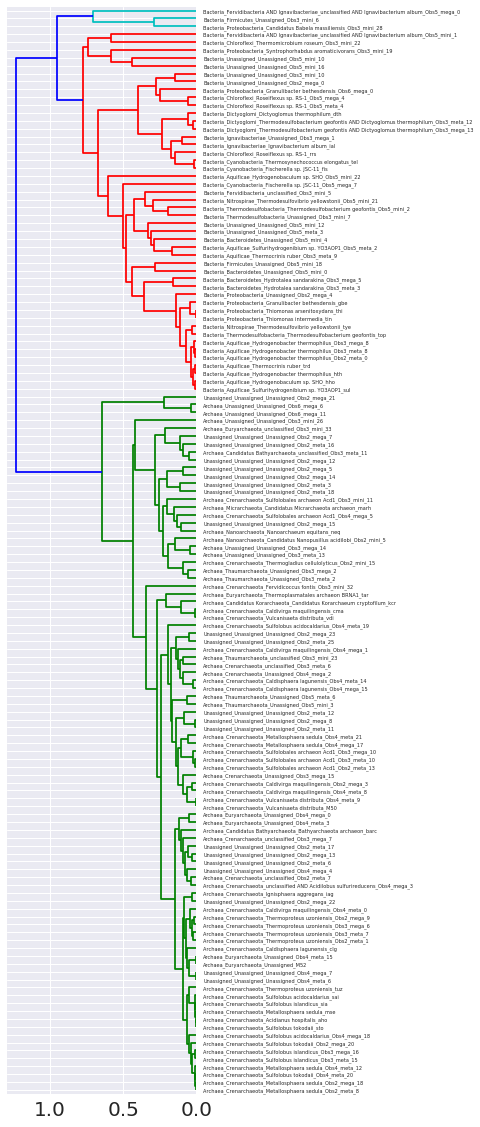

In [367]:
plt.clf()
f= plt.figure()
import scipy
scipy.cluster.hierarchy.dendrogram(optimalZcons,labels=labels,orientation='left',distance_sort='descending'
                                   ,count_sort='descending')
f.set_figwidth(15)
f.set_figheight(20)
plt.gcf().subplots_adjust(right=0.3)
f.savefig('dendro.pdf')
plt.show()

In [292]:
clustidxlist[listleves]

Index(['Obs3_meta_15', 'Obs3_mega_16', 'Obs4_mega_18', 'Obs4_meta_20',
       'Obs4_meta_12', 'Obs2_mega_18', 'Obs2_meta_8', 'aho', 'sto', 'mse',
       ...
       'Obs3_mega_1', 'ial', 'tel', 'fis', 'dth', 'Obs3_meta_12',
       'Obs3_mega_13', 'Obs5_meta_4', 'Obs5_mega_4', 'rrs'],
      dtype='object', length=138)

In [303]:
idxcl

[47,
 132,
 35,
 53,
 48,
 54,
 52,
 40,
 51,
 42,
 67,
 21,
 8,
 28,
 25,
 0,
 3,
 72,
 105,
 95,
 131,
 11,
 17,
 27,
 106,
 92,
 102,
 135,
 50,
 85,
 23,
 46,
 9,
 18,
 130,
 133,
 129,
 6,
 2,
 87,
 98,
 49,
 108,
 137,
 34,
 57,
 37,
 39,
 82,
 59,
 26,
 14,
 83,
 116,
 94,
 125,
 110,
 30,
 122,
 117,
 126,
 119,
 63,
 43,
 84,
 62,
 44,
 114,
 100,
 90,
 5,
 10,
 12,
 15,
 16,
 24,
 120,
 104,
 73,
 93,
 71,
 78,
 65,
 20,
 107,
 109,
 115,
 66,
 80,
 89,
 74,
 70,
 75,
 22,
 4,
 45,
 31,
 127,
 29,
 136,
 134,
 124,
 86,
 96,
 76,
 113,
 123,
 7,
 1,
 68,
 112,
 121,
 111,
 103,
 77,
 58,
 97,
 36,
 69,
 91,
 101,
 81,
 79,
 60,
 32,
 61,
 19,
 13,
 118,
 33,
 88,
 99,
 64,
 56,
 55,
 38,
 41,
 128]

In [365]:
combinedMeta

,# contigs,# genomes,# marker sets,# markers,# predicted genes,Coding density,Completeness,Contamination,GC,GC std,...,Mean contig length,N50 (contigs),Strain heterogeneity,assembly,domain,length,marker lineage,phylum,sample,species
M50,178,59,136,174,1902,0.910811,69.4853,0,0.452029,0.0208142,...,9643.1,10498,0.0,megameta,Archaea,1.71647e+06,k__Archaea,Crenarchaeota,Obs4,Vulcanisaeta distributa
M52,66,148,124,187,1395,0.910007,96.7742,0.806452,0.359978,0.0190859,...,19919.6,25904,0.0,megameta,Archaea,1.3147e+06,p__Euryarchaeota,Euryarchaeota,Obs4,Unassigned
Obs2_mega_3,137,59,136,174,1281,0.896678,58.734,0,0.479817,0.0256915,...,8177.16,8627,0.0,mega,Archaea,1.12027e+06,k__Archaea,Crenarchaeota,Obs2,Caldivirga maquilingensis
Obs2_mini_15,55,41,158,245,536,0.899123,35.4236,0.21097,0.491676,0.0174322,...,7649.27,8025,0.0,mini,Archaea,420710,c__Thermoprotei,Crenarchaeota,Obs2,Thermogladius cellulolyticus
Obs2_mini_5,33,5656,24,56,318,0.926326,12.5,0,0.263766,0.0449799,...,7501.48,7329,0.0,mini,Archaea,247549,root,Nanoarchaeota,Obs2,Candidatus Nanopusillus acidilobi
Obs3_mini_10,77,5443,59,105,731,0.951865,45.8398,0,0.573654,0.0236793,...,8663.87,8987,0.0,mini,Bacteria,667118,k__Bacteria,Unassigned,Obs3,Unassigned
Obs3_mini_19,44,5449,58,104,341,0.938949,14.7335,0,0.435296,0.0171368,...,7185.86,7031,0.0,mini,Bacteria,316178,k__Bacteria,Proteobacteria,Obs3,Syntrophorhabdus aromaticivorans
Obs3_mini_23,72,207,103,145,810,0.879971,45.0647,0,0.512375,0.0209135,...,8771.36,9280,0.0,mini,Archaea,631538,k__Archaea,Thaumarchaeota,Obs3,unclassified
Obs3_mini_26,43,207,107,149,416,0.877627,17.757,0,0.491919,0.0186683,...,7851.12,7976,0.0,mini,Archaea,337598,k__Archaea,Unassigned,Obs3,Unassigned
Obs3_mini_28,29,5449,58,104,294,0.899378,17.3981,0,0.325638,0.0245071,...,9126.38,9200,0.0,mini,Bacteria,264665,k__Bacteria,Proteobacteria,Obs3,Candidatus Babela massiliensis


In [334]:
optimalZ

array([[  1.26000000e+02,   1.19000000e+02,   1.11022302e-16,
          2.00000000e+00],
       [  1.27000000e+02,   2.90000000e+01,   2.72390961e-04,
          2.00000000e+00],
       [  3.00000000e+01,   1.22000000e+02,   5.22667020e-04,
          2.00000000e+00],
       [  1.00000000e+01,   1.20000000e+01,   1.20455071e-03,
          2.00000000e+00],
       [  7.40000000e+01,   7.00000000e+01,   1.69334576e-03,
          2.00000000e+00],
       [  8.40000000e+01,   6.20000000e+01,   1.76645293e-03,
          2.00000000e+00],
       [  1.70000000e+01,   2.70000000e+01,   1.82937702e-03,
          2.00000000e+00],
       [  9.60000000e+01,   7.60000000e+01,   1.84104343e-03,
          2.00000000e+00],
       [  7.20000000e+01,   1.05000000e+02,   1.98857034e-03,
          2.00000000e+00],
       [  1.41000000e+02,   1.50000000e+01,   3.19684713e-03,
          3.00000000e+00],
       [  4.30000000e+01,   1.43000000e+02,   4.19311161e-03,
          3.00000000e+00],
       [  1.04000000e

In [373]:
alt5

,domain,phylum,species,assembly,orig doms,orig phyl,clustsum,sample,length
M00,Bacteria,Aquificae,Hydrogenobacter thermophilus,megameta,BacteriaBacteria,AquificaeAquificae,Obs2_mega_1Obs2_meta_0,Obs2,3095250.0
M01,Archaea,Crenarchaeota,Thermoproteus uzoniensis,megameta,ArchaeaArchaea,CrenarchaeotaCrenarchaeota,Obs2_mega_9Obs2_meta_1,Obs2,2760664.0
M02,Archaea,Crenarchaeota,unclassified,minimegameta,ArchaeaArchaeaArchaea,CrenarchaeotaCrenarchaeotaCrenarchaeota,Obs2_mini_1Obs2_mega_2Obs2_meta_7,Obs2,1990258.0
M03,Bacteria,Unassigned,Unassigned,minimega,BacteriaBacteria,UnassignedUnassigned,Obs2_mini_0Obs2_mega_0,Obs2,563673.0
M04,Archaea,Crenarchaeota,Vulcanisaeta distributa,minimeta,ArchaeaArchaea,CrenarchaeotaCrenarchaeota,Obs2_mini_4Obs2_meta_4,Obs2,1600373.0
M05,Bacteria,Proteobacteria,Unassigned,megameta,BacteriaBacteria,ProteobacteriaProteobacteria,Obs2_mega_4Obs2_meta_2,Obs2,2992581.0
M06,Unassigned,Unassigned,Unassigned,megameta,UnassignedUnassigned,UnassignedUnassigned,Obs2_mega_5Obs2_meta_3,Obs2,802941.0
M07,Archaea,Crenarchaeota,Unassigned,minimeta,ArchaeaArchaea,CrenarchaeotaCrenarchaeota,Obs2_mini_2Obs2_meta_10,Obs2,1674454.0
M08,Unassigned,Unassigned,Unassigned,minimegameta,UnassignedUnassignedUnassigned,UnassignedUnassignedUnassigned,Obs2_mini_6Obs2_mega_7Obs2_meta_5,Obs2,3513314.0
M09,Unassigned,Unassigned,Unassigned,megameta,UnassignedUnassigned,UnassignedUnassigned,Obs2_mega_8Obs2_meta_11,Obs2,3032571.0
